In [2]:
from psycopg2 import connect
import psycopg2.sql as pg
import configparser
import datetime
%matplotlib inline
import numpy as np
import pandas as pd
import pandas.io.sql as pandasql
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set(color_codes=True)
from IPython.display import HTML
def print_table(sql, con):
    return HTML(pandasql.read_sql(sql, con).to_html(index=False))

In [39]:
CONFIG = configparser.ConfigParser()
CONFIG.read(r'/home/jchew/local/db.cfg')
dbset = CONFIG['DBSETTINGS']
con = connect(**dbset)

In [43]:
sql = pg.SQL('''
SELECT *
FROM congestion.tt_segments_baseline_test''')
segments_baseline = pandasql.read_sql(sql, con)

Text(0.5, 1.0, 'Travel Time Overnight Baseline')

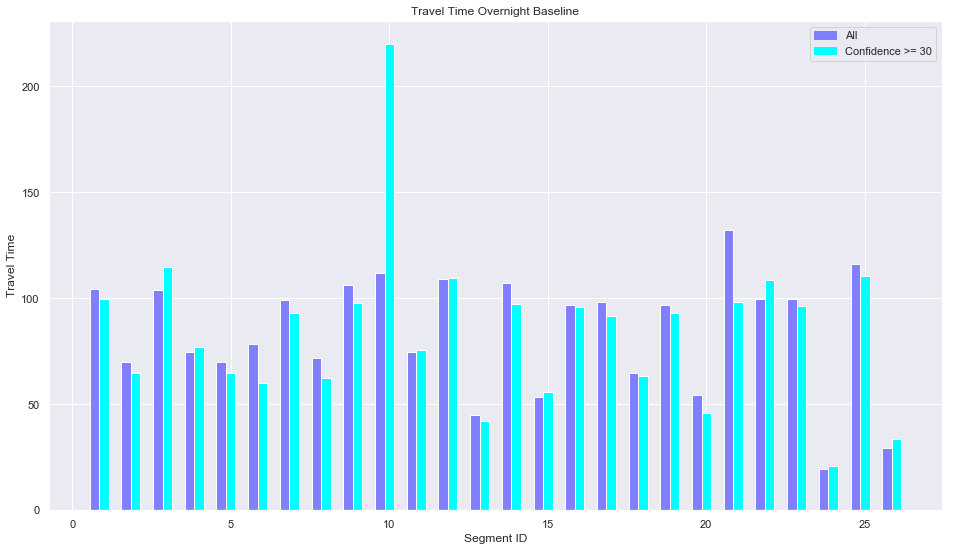

In [44]:
fig, ax = plt.subplots (1,1, figsize=(16,9))
NUM_COLORS = 2
cm = plt.get_cmap('cool')
bar_width = 0.3
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

handles = []
ax.bar(segments_baseline['segment_id'].values- bar_width, segments_baseline['tt_baseline_overnight_all'], width=bar_width, color = colors[1], label="All")
handles.append(mpl.patches.Patch(color=colors[1], label= "All"))

ax.bar(segments_baseline['segment_id'].values, segments_baseline["tt_baseline_overnight_hc"], width=bar_width, color = colors[0], label="Confidence >= 30")
handles.append(mpl.patches.Patch(color=colors[0], label= "Confidence >= 30"))

ax.legend(handles=handles)
ax.set_xlabel('Segment ID')
ax.set_ylabel('Travel Time')
ax.set_title('Travel Time Overnight Baseline')


Text(0.5, 1.0, 'Travel Time 10th Percentile Baseline')

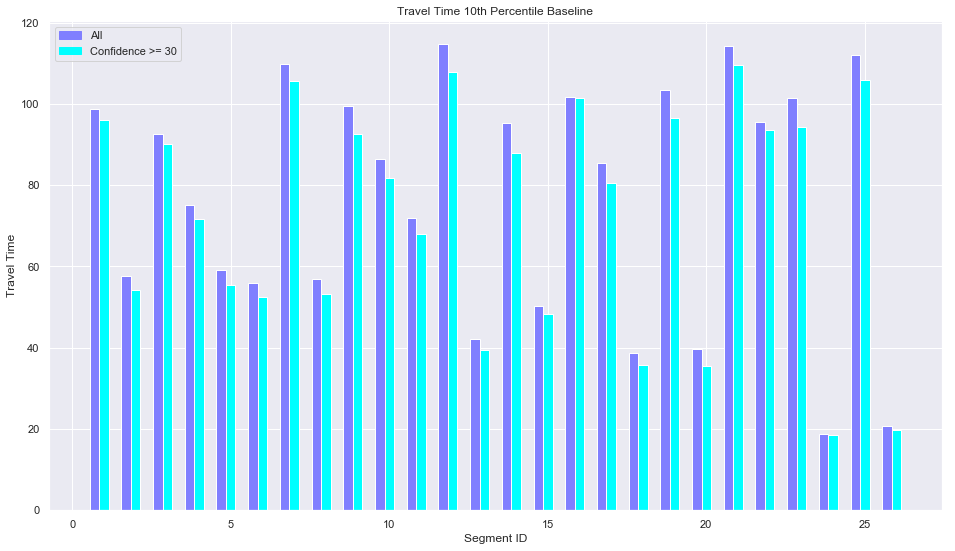

In [45]:
fig, ax = plt.subplots (1,1, figsize=(16,9))
NUM_COLORS = 2
cm = plt.get_cmap('cool')
bar_width = 0.3
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

handles = []
ax.bar(segments_baseline['segment_id'].values- bar_width, segments_baseline['tt_baseline_10pct_all'], width=bar_width, color = colors[1], label="All")
handles.append(mpl.patches.Patch(color=colors[1], label= "All"))

ax.bar(segments_baseline['segment_id'].values, segments_baseline["tt_baseline_10pct_hc"], width=bar_width, color = colors[0], label="Confidence >= 30")
handles.append(mpl.patches.Patch(color=colors[0], label= "Confidence >= 30"))

ax.legend(handles=handles)
ax.set_xlabel('Segment ID')
ax.set_ylabel('Travel Time')
ax.set_title('Travel Time 10th Percentile Baseline')


Text(0.5, 1.0, 'Speed Overnight Baseline')

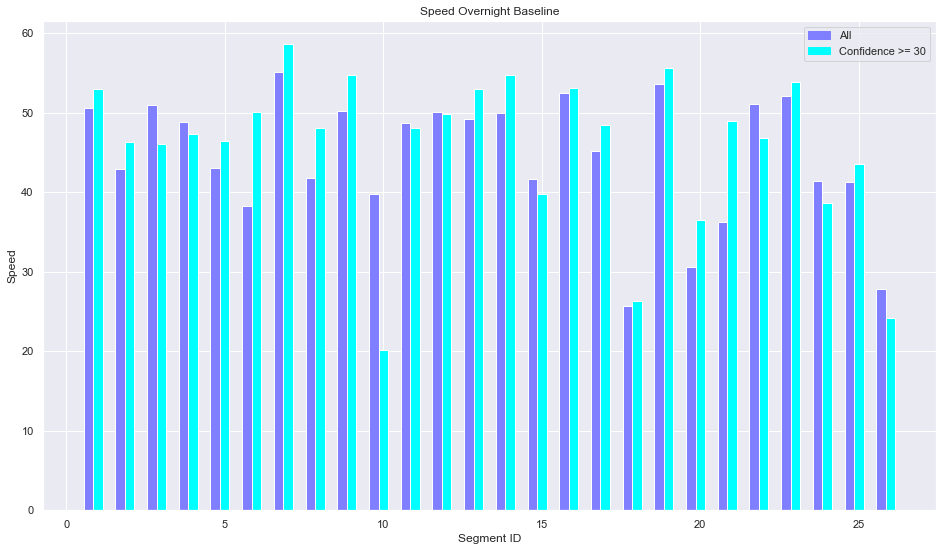

In [46]:
fig, ax = plt.subplots (1,1, figsize=(16,9))
NUM_COLORS = 2
cm = plt.get_cmap('cool')
bar_width = 0.3
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

handles = []
ax.bar(segments_baseline['segment_id'].values- bar_width, segments_baseline['spd_baseline_overnight_all'], width=bar_width, color = colors[1], label="All")
handles.append(mpl.patches.Patch(color=colors[1], label= "All"))

ax.bar(segments_baseline['segment_id'].values, segments_baseline["spd_baseline_overnight_hc"], width=bar_width, color = colors[0], label="Confidence >= 30")
handles.append(mpl.patches.Patch(color=colors[0], label= "Confidence >= 30"))

ax.legend(handles=handles)
ax.set_xlabel('Segment ID')
ax.set_ylabel('Speed')
ax.set_title('Speed Overnight Baseline')


Text(0.5, 1.0, 'Speed 10th Percentile Baseline')

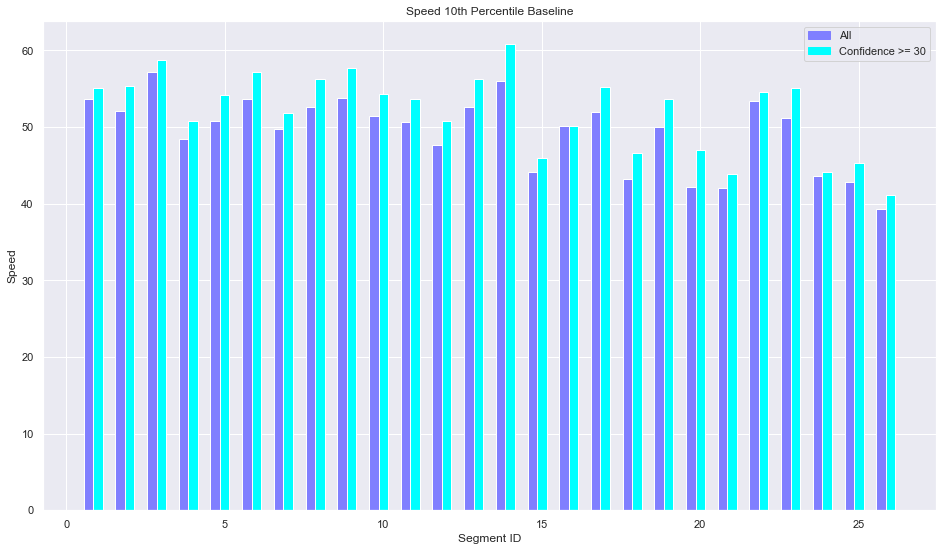

In [47]:
fig, ax = plt.subplots (1,1, figsize=(16,9))
NUM_COLORS = 2
cm = plt.get_cmap('cool')
bar_width = 0.3
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

handles = []
ax.bar(segments_baseline['segment_id'].values- bar_width, segments_baseline['spd_baseline_10pct_all'], width=bar_width, color = colors[1], label="All")
handles.append(mpl.patches.Patch(color=colors[1], label= "All"))

ax.bar(segments_baseline['segment_id'].values, segments_baseline["spd_baseline_10pct_hc"], width=bar_width, color = colors[0], label="Confidence >= 30")
handles.append(mpl.patches.Patch(color=colors[0], label= "Confidence >= 30"))

ax.legend(handles=handles)
ax.set_xlabel('Segment ID')
ax.set_ylabel('Speed')
ax.set_title('Speed 10th Percentile Baseline')

Text(0.5, 1.0, '10th Percentile vs Overnight Speed')

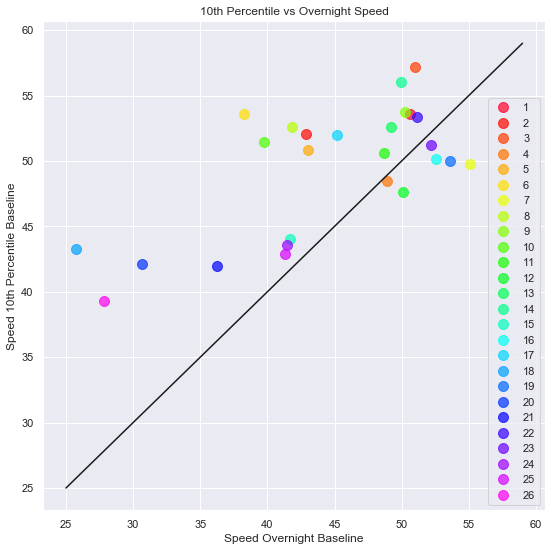

In [62]:
fig, ax = plt.subplots (1,1, figsize=(9,9))
NUM_COLORS = 26
cm = plt.get_cmap('gist_rainbow')
colors = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

groups = segments_baseline.groupby('segment_id')
for i, (segment_id, data) in enumerate(groups):
    ax.plot(data.spd_baseline_overnight_all, data.spd_baseline_10pct_all, marker = 'o', markersize = 10 ,
            alpha = 0.7, linestyle = '', label = segment_id, color = colors[i])

ax.plot(range(25,60), range(25,60), '-', color = 'k')
ax.legend()
ax.set_xlabel('Speed Overnight Baseline')
ax.set_ylabel('Speed 10th Percentile Baseline')
ax.set_title('10th Percentile vs Overnight Speed')

Text(0.5, 1.0, '10th Percentile vs Overnight Speed')

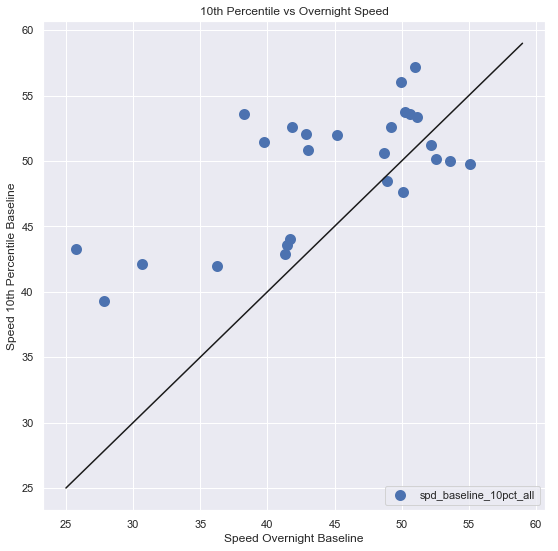

In [75]:
# Easier way to plot scatter diagram
fig, ax = plt.subplots (1,1, figsize=(9,9))
    
ax.scatter(segments_baseline['spd_baseline_overnight_all'], segments_baseline['spd_baseline_10pct_all'], marker = 'o', linewidths = 5)
ax.plot(range(25,60), range(25,60), '-', color = 'k')

ax.legend(loc = 4)
ax.set_xlabel('Speed Overnight Baseline')
ax.set_ylabel('Speed 10th Percentile Baseline')
ax.set_title('10th Percentile vs Overnight Speed')